###### Prepared By : Shahzaib

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied that is What will be predicted score if a student will study 9.25 hrs/day?

This is a simple linear regression task as it involves just two variables.

In [2]:
# Importing all required libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading the Data from Database via link
url = "http://bit.ly/w-data"
st_data = pd.read_csv(url)
print("Data loaded Successfully! ")

st_data.head()

Data loaded Successfully! 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30



Let's visualize our data on a 2D plot to see if we can identify any patterns or relationships. We can use the following script to create the plot:

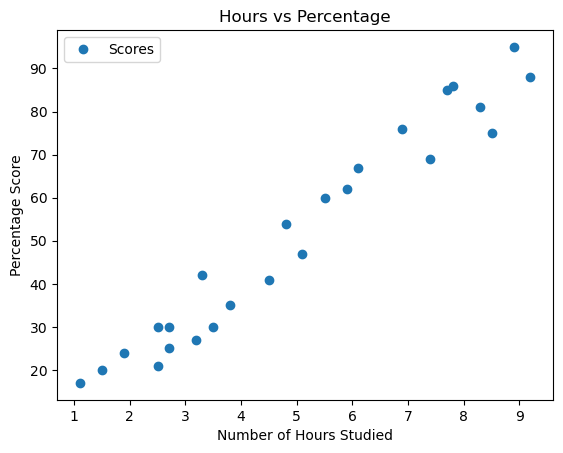

In [4]:
st_data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.xlabel("Number of Hours Studied")
plt.ylabel("Percentage Score")
plt.title("Hours vs Percentage")
plt.show()

#### The graph shows a clear positive linear relationship between hours studied and percentage scored.

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
X = st_data.iloc[:,:-1].values
y = st_data.iloc[:,1].values

Once we have our features and target variables, we can split the data into training and test sets using Scikit-Learn's train_test_split() function.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training Succeeded!")

Training Succeeded!


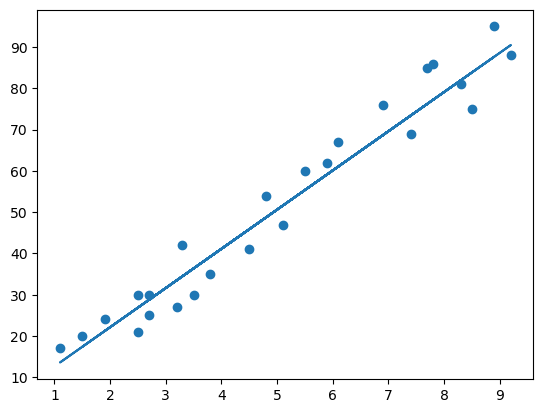

In [8]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

## Making Predictions
With our algorithm trained, we can now make predictions.

In [9]:
print(X_test) # Testind Data in hours
y_pred = regressor.predict(X_test) # Predicting the Scores

[[6.1]
 [1.9]
 [4.5]
 [6.9]
 [8.9]]


In [10]:
# Comparing the actual score vs predicted score
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
0,67,61.072402
1,24,21.181131
2,41,45.875727
3,76,68.670739
4,95,87.666582


Now, moving towards the actual question: What will be predicted score if a student will study 9.25 hrs/day?

In [11]:
hours = 9.25
hours_2d = np.array([hours]).reshape(-1, 1)  # Reshape to a 2D array

ques_pred = regressor.predict(hours_2d)
print("No of Hours = {}".format(hours))
print("Predicted Scores = {}".format(ques_pred[0]))

No of Hours = 9.25
Predicted Scores = 90.99085500040755


It is clear from prediction, if a student will study 9.25 hrs/day, he may able to achieve 90% marks. 

## **Evaluating the Model**
Evaluating the performance of the algorithm is essential for comparing different algorithms on the same dataset. We have choosen the Root Mean Squared Error because it is more interpretable.

In [12]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 5.905120371729122
